In [6]:
import torch
import torchaudio

import IPython

import os
import wave

import matplotlib.pyplot as plt

In [7]:
with wave.open("data/audio/DownTheRabbitHoleFinal_SoundFile1.wav", "rb") as wave_file:
    frame_rate = wave_file.getframerate()
    num_frames = wave_file.getnframes()

print("Frame rate: " + str(frame_rate))
print("Num frames: " + str(num_frames))

Frame rate: 44100
Num frames: 2537541


In [8]:
device = torch.device("cuda")

bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H

print("Sample Rate:", bundle.sample_rate)

print("Labels:", bundle.get_labels())

Sample Rate: 16000
Labels: ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')


In [9]:
model = bundle.get_model().to(device)

In [10]:
IPython.display.Audio("./data/audio/DownTheRabbitHoleFinal_SoundFile1.wav")

In [11]:
waveform, sample_rate = torchaudio.load("./data/audio/DownTheRabbitHoleFinal_SoundFile1.wav")
waveform = waveform.to(device)

if sample_rate != bundle.sample_rate:
    waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)

waveform.shape

torch.Size([1, 920650])

In [12]:
with torch.inference_mode():
    features, _ = model.extract_features(waveform)

# batch_size, T, F
for feature in features:
    print(feature.shape)

torch.Size([1, 2876, 768])
torch.Size([1, 2876, 768])
torch.Size([1, 2876, 768])
torch.Size([1, 2876, 768])
torch.Size([1, 2876, 768])
torch.Size([1, 2876, 768])
torch.Size([1, 2876, 768])
torch.Size([1, 2876, 768])
torch.Size([1, 2876, 768])
torch.Size([1, 2876, 768])
torch.Size([1, 2876, 768])
torch.Size([1, 2876, 768])


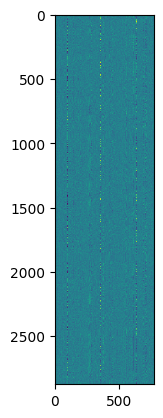

In [17]:
plt.imshow(features[0][0].cpu(), interpolation="nearest")

In [18]:
with torch.inference_mode():
    emission, _ = model(waveform)

# batch_size, T, output_dims
emission.shape

torch.Size([1, 2876, 29])

In [20]:
outputs = torch.argmax(emission[0], 1)
outputs = torch.unique_consecutive(outputs, dim=0)
outputs.shape

torch.Size([1374])

In [23]:
labels = bundle.get_labels()

output = ""

for sample in outputs:
    output += labels[sample]

output = output.replace("-", "")

print(output)

ALICE|WAS|BEGINNING|TO|GET|VERY|TIRED|OF|SITTING|BY|HER|SISTER|ON|THE|BANK|AND|OF|HAVING|NOTHING|TO|DO|ONCE|OR|TWICE|SHE|PEEPED|INTO|THE|BOOK|HER|SISTER|WAS|READING|BUT|IT|HAD|NO|PICTURES|OR|CONVERSATIONS|IN|IT|AND|WHAT'S|THE|USE|OF|A|BOOK|THOUGHT|ALICE|WITHOUT|PICTURES|OR|CONVERSATION|SO|SHE|WAS|CONSIDERING|IN|HER|OWN|MIND|AS|WELL|AS|SHE|COULD|FOR|THE|HOT|DAY|MADE|HER|FEEL|VERY|SLEEPY|AND|STUPID|WHETHER|THE|PLEASURE|OF|MAKING|A|DAISY|CHAIN|WOULD|BE|WORTH|THE|TROUBLE|OF|GETTING|UP|AND|PICKING|THE|DAISIES|WHEN|SUDDENLY|A|WHITE|RABBIT|WITH|PINK|EYES|RAN|CLOSE|BY|HER|THERE|WAS|NOTHING|SO|VERY|REMARKABLE|IN|THAT|NOR|DID|ALICE|THINK|IT|SO|VERY|MUCH|OUT|OF|THE|WAY|TO|HEAR|THE|RABBIT|SAY|TO|ITSELF|OH|DEAR|OH|DEAR|I|SHALL|BE|LATE|WHEN|SHE|THOUGHT|IT|OVER|AFTERWARDS|IT|OCCURRED|TO|HER|THAT|SHE|OUGHT|TO|HAVE|WONDERED|AT|THIS|BUT|AT|THE|TIME|IT|ALL|SEEMED|QUITE|NATURAL|
